In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import graphviz
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [2]:
#Cargo datos de entrada
autos = pd.read_csv(r"car.data")

In [3]:
#Filas, columnas
autos.shape

(1728, 7)

In [4]:
#Veo primeras filas
autos.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
#Agrupo por buying
autos.groupby('buying').size()

buying
high     432
low      432
med      432
vhigh    432
dtype: int64

In [6]:
#Agrupo por maint
autos.groupby('maint').size()

maint
high     432
low      432
med      432
vhigh    432
dtype: int64

In [7]:
#Agrupo por doors
autos.groupby('doors').size()

doors
2        432
3        432
4        432
5more    432
dtype: int64

In [8]:
#Agrupo por persons
autos.groupby('persons').size()

persons
2       576
4       576
more    576
dtype: int64

In [9]:
#Agrupo por lug_boot
autos.groupby('lug_boot').size()

lug_boot
big      576
med      576
small    576
dtype: int64

In [10]:
#Agrupo por safety
autos.groupby('safety').size()

safety
high    576
low     576
med     576
dtype: int64

In [11]:
#Agrupo por class
autos.groupby('class').size()

class
acc       384
good       69
unacc    1210
vgood      65
dtype: int64

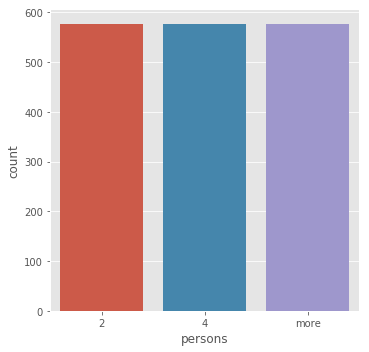

In [12]:
#Grafico persons
sb.catplot('persons',data=autos,kind="count")#, aspect=3)

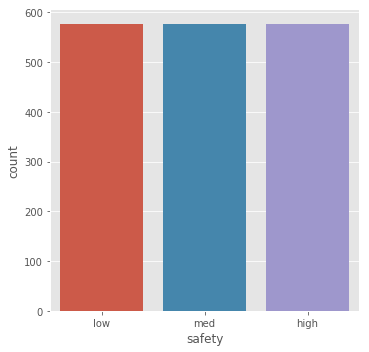

In [13]:
#Grafico safety
sb.catplot('safety',data=autos,kind="count")

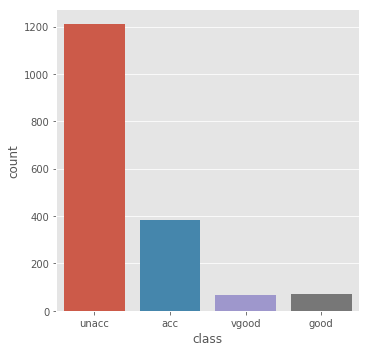

In [14]:
#Grafico class
sb.catplot('class',data=autos,kind="count")

In [15]:
#Tipos: buying
#compra = autos.groupby('buying').size()
lista_compra = autos['buying'].unique()#compra.sort_values(ascending=False)
print(lista_compra)

['vhigh' 'high' 'med' 'low']


In [16]:
#Tipos: maint
lista_mantenimiento = autos['maint'].unique()
print(lista_mantenimiento)

['vhigh' 'high' 'med' 'low']


In [17]:
#Tipos: doors
lista_puertas = autos['doors'].unique()
print(lista_puertas)

['2' '3' '4' '5more']


In [18]:
#Tipos: persons
lista_personas = autos['persons'].unique()
print(lista_personas)

['2' '4' 'more']


In [19]:
#Tipos: lug_boot
lista_botonera = autos['lug_boot'].unique()
print(lista_botonera)

['small' 'med' 'big']


In [20]:
#Tipos: safety
lista_seguridad = autos['safety'].unique()
print(lista_seguridad)

['low' 'med' 'high']


In [49]:
#Tipos: class
lista_clases = autos['class'].unique()
print(lista_clases)

['unacc' 'acc' 'vgood' 'good']


In [22]:
#Mapeao atributos buying
autos['buying_cod'] = autos['buying'].map({
                                            'vhigh':0,
                                            'high':1,
                                            'med':2,
                                            'low':3,
})


In [23]:
#Mapeao atributos maint
autos['maint_cod'] = autos['maint'].map({
                                            'vhigh':0,
                                            'high':1,
                                            'med':2,
                                            'low':3,
})

In [24]:
#Mapeao atributos doors
autos['doors_cod'] = autos['doors'].map({
                                        '2':0,
                                        '3':1,
                                        '4':2,
                                        '5more':3
})

In [25]:
#Mapeao atributos persons
autos['persons_cod'] = autos['persons'].map({
                                        '2':0,
                                        '4':1,
                                        'more':2,
})

In [26]:
#Mapeao atributos lug_boot
autos['lug_boot_cod'] = autos['lug_boot'].map({
                                        'small':0,
                                        'med':1,
                                        'big':2,
})

In [27]:
#Mapeao atributos safety
autos['safety_cod'] = autos['safety'].map({
                                        'low':0,
                                        'med':1,
                                        'high':2,
})

In [52]:
#Mapeao atributos buying
autos['class_cod'] = autos['class'].map({
                                            'unacc':0,
                                            'acc':1,
                                            'vgood':2,
                                            'good':3,
})

In [54]:
#Borro columnas originales, dejo las mapeadas
drop_elements = ['buying','maint','doors','persons','lug_boot','safety','class']
autos_cod = autos.drop(drop_elements, axis = 1)

In [55]:
autos_cod.head()

,buying_cod,maint_cod,doors_cod,persons_cod,lug_boot_cod,safety_cod,class_cod
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [56]:
autos_cod.describe()

,buying_cod,maint_cod,doors_cod,persons_cod,lug_boot_cod,safety_cod,class_cod
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.417245
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.747188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


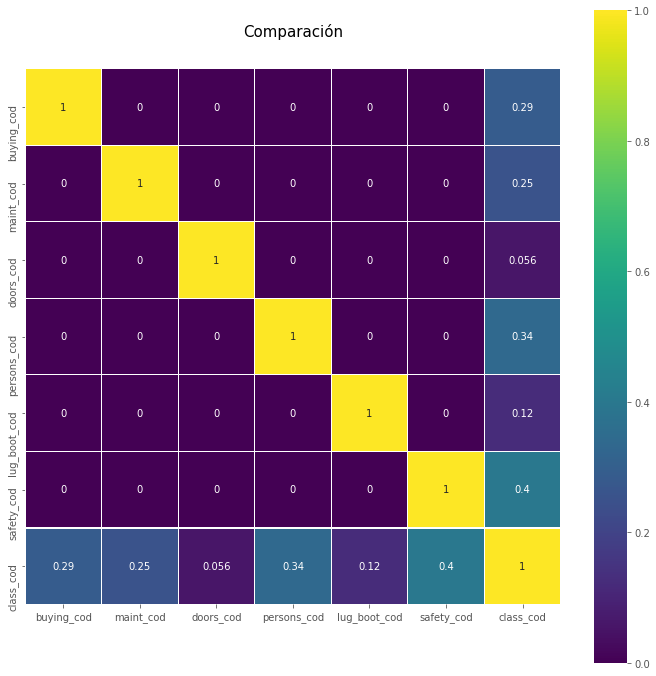

In [57]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Comparación', y=1.05, size=15)
sb.heatmap(autos_cod.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [58]:
#Buscamos la profundidad para nuestro árbol de decisión
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(autos_cod))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             #class_weight={1:3.5}
                                            )
    for train_fold, valid_fold in cv.split(autos_cod):
        #print(autos_cod)
        #print(autos_cod.loc['vhigh'])
        f_train = autos_cod[train_fold[0]:train_fold[len(train_fold)-1]] 
        f_valid = autos_cod[valid_fold[0]:valid_fold[len(valid_fold)-1]] 

        model = tree_model.fit(X = f_train.drop(['class_cod'], axis=1), 
                               y = f_train["class_cod"]) 
        valid_acc = model.score(X = f_valid.drop(['class_cod'], axis=1), 
                                y = f_valid["class_cod"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)
 
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.701248
         2          0.778179
         3          0.750272
         4          0.824116
         5          0.872450
         6          0.898643
         7          0.941133


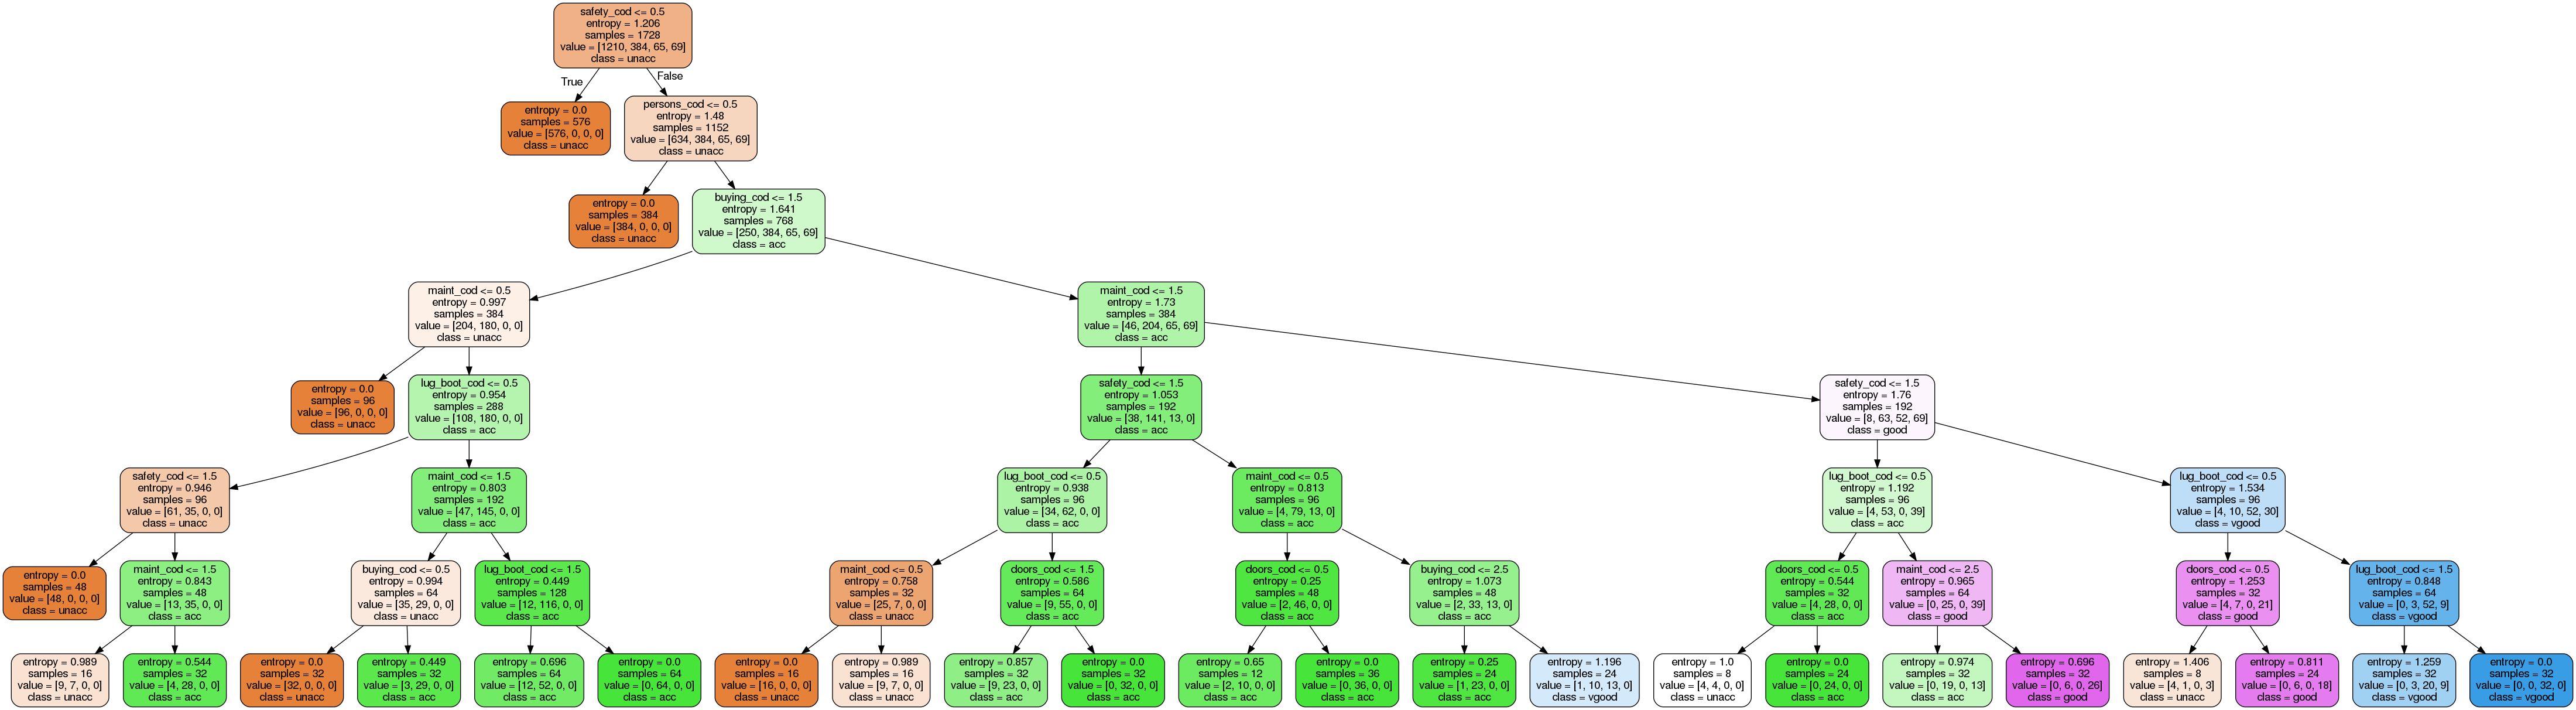

In [60]:
#En 7 niveles tenemos el porcentaje mas alto

# Crear arrays de entrenamiento
y_train = autos_cod['class_cod']
x_train = autos_cod.drop(['class_cod'], axis=1).values 
 
# Crear Arbol de decision con profundidad = 7
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 7,
                                            #class_weight={1:3.5}
                                           )
decision_tree.fit(x_train, y_train)
 
# exportar el modelo a archivo .dot
with open(r"cars_tree.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(autos_cod.drop(['class_cod'], axis=1)),
                              class_names = ['unacc','acc','vgood','good'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
#check_call(['dot','-Tpng',r'cars_tree.dot','-o',r'cars_tree.png'])
#Si no tenemos graphviz
#subprocess.call("sudo apt install graphviz",shell=True)
#Creamos png desde dot
import subprocess
subprocess.call("dot -Tpng cars_tree.dot -o cars_tree.png",shell=True)
PImage("cars_tree.png")